# MML 4 - Finding and working with ARGO Floats data from the GeoDB

In this notebook, we deal specifically with ARGO Floats data and see how we can display and exploit the data. We again start with a few necessary imports.

In [1]:
from xcube_geodb.core.geodb import GeoDBClient

import matplotlib.pyplot as plt

from ipyleaflet import Map, basemaps, GeoData

from shapely import box, intersects, Polygon

We start by instantiating access to the geoDB again.

In [2]:
geodb = GeoDBClient()

We check whether the connection could be established.

In [3]:
geodb.whoami

'geodb_doors-user'

At this point, we specifically look for ARGO Floats datasets. These have the term `ARGO` in the database, so we look for these.

In [4]:
df = geodb.get_my_collections()
doors_collections = df[df["database"].str.contains("ARGO")==True]
doors_collections

,owner,database,collection
19,geodb_doors-io-bas-admin,black_sea_ARGO,WMO1902575
20,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3901852
21,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3901854
22,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3901855
23,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3902004
24,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3902005
25,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3902006
26,geodb_doors-io-bas-admin,black_sea_ARGO,WMO3902461
27,geodb_doors-io-bas-admin,black_sea_ARGO,WMO4903711
28,geodb_doors-io-bas-admin,black_sea_ARGO,WMO5906866


At this point, we can re-use the intersects_box-function to find collections that lie within an area of interest.

In [5]:
x_min = 28.5
y_min = 41.5
x_max = 29.5
y_max = 42
box_of_interest = box(x_min, y_min, x_max, y_max)

def intersects_box(bbox: Polygon):
    for index, collection_row in doors_collections.iterrows():
        collection_bbox = geodb.get_collection_bbox(collection_row.collection, database=collection_row.database)
        if collection_bbox is not None:
            xmin, ymin, xmax, ymax = collection_bbox
            collection_box = box(ymin, xmin, ymax, xmax)
            if intersects(box_of_interest, collection_box):
                print(f'Database: {collection_row.database} / Collection: {collection_row.collection}')

intersects_box(box_of_interest)

Database: black_sea_ARGO / Collection: WMO1902575
Database: black_sea_ARGO / Collection: WMO3901852
Database: black_sea_ARGO / Collection: WMO3901854
Database: black_sea_ARGO / Collection: WMO3901855
Database: black_sea_ARGO / Collection: WMO3902004
Database: black_sea_ARGO / Collection: WMO3902005
Database: black_sea_ARGO / Collection: WMO3902006
Database: black_sea_ARGO / Collection: WMO3902461
Database: black_sea_ARGO / Collection: WMO4903711
Database: black_sea_ARGO / Collection: WMO5906866
Database: black_sea_ARGO / Collection: WMO6900803
Database: black_sea_ARGO / Collection: WMO6900804
Database: black_sea_ARGO / Collection: WMO6900805
Database: black_sea_ARGO / Collection: WMO6900807
Database: black_sea_ARGO / Collection: WMO6901828
Database: black_sea_ARGO / Collection: WMO6901831
Database: black_sea_ARGO / Collection: WMO6901832
Database: black_sea_ARGO / Collection: WMO6901833
Database: black_sea_ARGO / Collection: WMO6901834
Database: black_sea_ARGO / Collection: WMO6901866


We pick one of them, this time the whole collection. 

In [6]:
gdf = geodb.get_collection('WMO7900590', database="black_sea_ARGO")
gdf

,id,created_at,modified_at,geometry,platform_number,platform_type,pi_name,data_type,cycle_number,direction,...,psal_adjusted (psu),psal_adjusted_qc,psal_adjusted_error (psu),temp (°c),temp_qc,temp_adjusted (°c),temp_adjusted_qc,temp_adjusted_error (°c),timestamp,provider_data_collector
0,1,2024-08-26T11:39:17.751797+00:00,None,POINT (29.15300 42.99300),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,1,D,...,17.991,1,0.01,25.523,4,NaN,4,NaN,2013-08-29 09:14:00,https://erddap.ifremer.fr/erddap/index.html
1,2,2024-08-26T11:39:17.751797+00:00,None,POINT (29.15300 42.99300),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,1,D,...,18.011,1,0.01,24.626,4,NaN,4,NaN,2013-08-29 09:14:00,https://erddap.ifremer.fr/erddap/index.html
2,3,2024-08-26T11:39:17.751797+00:00,None,POINT (29.15300 42.99300),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,1,D,...,18.288,1,0.01,12.176,4,NaN,4,NaN,2013-08-29 09:14:00,https://erddap.ifremer.fr/erddap/index.html
3,4,2024-08-26T11:39:17.751797+00:00,None,POINT (29.15300 42.99300),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,1,D,...,18.334,1,0.01,9.576,4,NaN,4,NaN,2013-08-29 09:14:00,https://erddap.ifremer.fr/erddap/index.html
4,5,2024-08-26T11:39:17.751797+00:00,None,POINT (29.15300 42.99300),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,1,D,...,18.395,1,0.01,8.581,4,NaN,4,NaN,2013-08-29 09:14:00,https://erddap.ifremer.fr/erddap/index.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,6294,2024-08-26T11:39:27.195805+00:00,None,POINT (41.68100 41.70500),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,135,A,...,17.250,1,0.01,22.877,1,22.877,1,0.002,2015-07-02 06:29:00,https://erddap.ifremer.fr/erddap/index.html
6294,6295,2024-08-26T11:39:27.195805+00:00,None,POINT (41.68100 41.70500),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,135,A,...,17.595,1,0.01,22.430,1,22.430,1,0.002,2015-07-02 06:29:00,https://erddap.ifremer.fr/erddap/index.html
6295,6296,2024-08-26T11:39:27.195805+00:00,None,POINT (41.68100 41.70500),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,135,A,...,17.754,1,0.01,20.274,1,20.274,1,0.002,2015-07-02 06:29:00,https://erddap.ifremer.fr/erddap/index.html
6296,6297,2024-08-26T11:39:27.195805+00:00,None,POINT (41.68100 41.70500),7900590,ARVOR,Violeta SLABAKOVA,Argo profile,135,A,...,18.062,1,0.01,10.760,1,10.760,1,0.002,2015-07-02 06:29:00,https://erddap.ifremer.fr/erddap/index.html


Again, we want to plot the data on a map.

In [7]:
gdf_center = gdf.unary_union.centroid
center = [gdf_center.y, gdf_center.x]
zoom = 6
m = Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)
geo_data = GeoData(
    geo_dataframe = gdf,
    style={'color': 'black', 'radius':6, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release'
)

This time, however, we want to improve the visualisation, so we add a widget that shows information about a data point when hovering.

In [8]:
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON

html = HTML("""""")
html.layout.margin = "0px 20px 20px 20px"
control = WidgetControl(widget=html, position="topright")

In [9]:
def update_html(feature, **kwargs):
    html.value = """
        <h3><b>{}</b></h3>
        <h4>Cycle Number: {}</h4> 
        <h4>Sea Pressure: {} decibar</h4>
        <h4>Practical Salinity: {} PSU</h4>
        <h4>Temperature: {} °C</h4>
    """.format(
        feature["properties"]["id"],
        feature["properties"]["cycle_number"],
        feature["properties"]["pres_adjusted (decibar)"],
        feature["properties"]["psal_adjusted (psu)"],    
        feature["properties"]["temp_adjusted (°c)"],    
    )

geo_data.on_hover(update_html)

We now add the geodata and the control widget at the same time, so we have one instance of the map in the notebook. On hovering over a point, we get additional information.

In [10]:
m.add(control)
m.add(geo_data)

Map(center=[41.68452238805972, 36.545902985074626], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Now, we can plot the actual data. For this, we create the following scatter plots.

Text(0, 0.5, 'Sea Pressure (Decibar)')

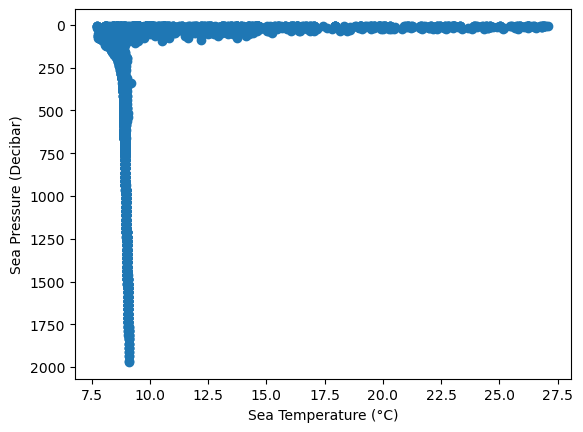

In [11]:
plt.scatter(gdf["temp (°c)"], gdf["pres (decibar)"])
plt.gca().invert_yaxis()
plt.xlabel("Sea Temperature (°C)")
plt.ylabel("Sea Pressure (Decibar)")

Text(0, 0.5, 'Sea Pressure (Decibar)')

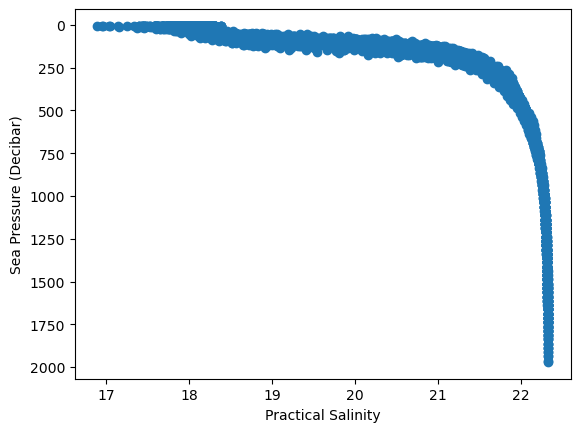

In [12]:
plt.scatter(gdf["psal (psu)"], gdf["pres (decibar)"])
plt.gca().invert_yaxis()
plt.xlabel("Practical Salinity")
plt.ylabel("Sea Pressure (Decibar)")

We also have the option to color code one of the variables.

Text(0, 0.5, 'Sea Temperature (°C)')

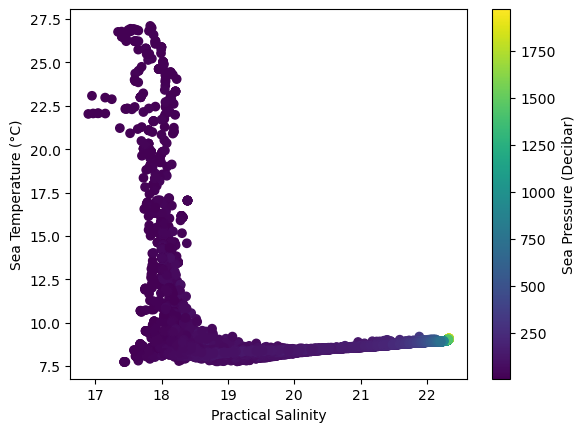

In [13]:
plt.scatter(gdf["psal (psu)"], gdf["temp (°c)"], c=gdf["pres (decibar)"], cmap='viridis')
plt.colorbar(label='Sea Pressure (Decibar)')
plt.xlabel("Practical Salinity")
plt.ylabel("Sea Temperature (°C)")